In [1]:
import numpy as np
import pandas as pd
import lucem_illud
from pandarallel import pandarallel
import sklearn
import gensim

import matplotlib.pyplot as plt

pandarallel.initialize(progress_bar=True)


Bad key text.latex.preview in file /software/python-anaconda-2020.11-el8-x86_64/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /software/python-anaconda-2020.11-el8-x86_64/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /software/python-anaconda-2020.11-el8-x86_64/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig

INFO: Pandarallel will run on 48 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
data = pd.read_csv('../data/csv_data/all_corona_data.csv')
data.head()

,id,length,date,country,publisher,snippet,body,body_tokens,body_tokens_normalized,snippet_tokens,trunc_sentence,sentiment_score,neg_sentim_score
0,73511305,681,21-10-01,US,pe.com,"More than 5,000 have died of coronavirus in Ri...","County's milestone comes after it hit 4,000 d...","['County', ""'s"", 'milestone', 'comes', 'after'...","['county', 'milestone', 'comes', 'hit', 'death...","['More', 'than', '5,000', 'have', 'died', 'of'...","[""County's milestone comes after it hit 4,000 ...","[{'label': 'POSITIVE', 'score': 0.989001750946...",0.500000
1,73511306,765,21-10-01,US,pe.com,Stocks rebound but still close out worst week ...,Stocks rebound but still close out worst week...,"['Stocks', 'rebound', 'but', 'still', 'close',...","['stocks', 'rebound', 'close', 'worst', 'week'...","['Stocks', 'rebound', 'but', 'still', 'close',...",['Stocks rebound but still close out worst wee...,"[{'label': 'NEGATIVE', 'score': 0.999289274215...",0.400000
2,73511563,1161,21-10-01,US,kwch.com,Metalla Completes Acquisition of 5% Royalty on...,( All Currency is in United States ( US$ ) do...,"['All', 'Currency', 'is', 'in', 'United', 'Sta...","['currency', 'united', 'states', 'us$', 'dolla...","['Metalla', 'Completes', 'Acquisition', 'of', ...",['( All Currency is in United States ( US$ ) d...,"[{'label': 'NEGATIVE', 'score': 0.961961030960...",0.666667
3,73512351,451,21-10-01,US,wtkr.com,"AP source: NBA vaccination rate climbing, now ...",MIAMI ( AP ) -- The NBA has seen a rise in va...,"['MIAMI', 'AP', 'The', 'NBA', 'has', 'seen', '...","['miami', 'ap', 'nba', 'seen', 'rise', 'vaccin...","['AP', 'source', 'NBA', 'vaccination', 'rate',...",['MIAMI ( AP ) -- The NBA has seen a rise in v...,"[{'label': 'NEGATIVE', 'score': 0.766066551208...",0.600000
4,88031971,1114,21-10-01,US,YAHOO!Finance,INVESTOR ALERT: Monteverde & Associates PC Con...,"NEW YORK , NY / ACCESSWIRE / October 1 , 2021...","['NEW', 'YORK', 'NY', 'ACCESSWIRE', 'October',...","['new', 'york', 'ny', 'accesswire', 'october',...","['INVESTOR', 'ALERT', 'Monteverde', 'Associate...","['NEW YORK , NY / ACCESSWIRE / October 1 , 202...","[{'label': 'POSITIVE', 'score': 0.890659987926...",0.333333


In [3]:
data.dropna(inplace=True)

In [4]:
# data['snippet_tokens'] = data['snippet'].parallel_apply(lambda x: lucem_illud.word_tokenize(x))
# data['snippet_tokens_normalized'] = data['snippet_tokens'].parallel_apply(lambda x: lucem_illud.normalizeTokens(x))

In [5]:
# data['body_tokens'] = data['body'].parallel_apply(lambda x: lucem_illud.word_tokenize(x))
# data['body_tokens_normalized'] = data['body_tokens'].parallel_apply(lambda x: lucem_illud.normalizeTokens(x))

In [6]:
# data.drop(columns=['url', 'Unnamed: 0', 'snippet_tokens_normalized'], inplace=True)

In [7]:
# data.to_csv('../data/csv_data/all_corona_data.csv', index=False)

In [11]:
stop_words = list(gensim.parsing.preprocessing.STOPWORDS)
stop_words.append('said')
stop_words.append('like')

In [12]:
covidTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.98, min_df=2, 
                                                                    stop_words=stop_words, norm='l2')
covidTFVects = covidTFVectorizer.fit_transform(data['body'])

In [9]:
import re
data['body_tokens_normalized'] = data['body_tokens_normalized'].parallel_apply(lambda x: [re.sub('[^0-9a-zA-Z]+', '', k) 
                                                                                for k in x.split(',')])
# re.sub('[^0-9a-zA-Z]+', '', data['body_tokens_normalized'][0].split(',')[0])

In [13]:
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]

data['body_tokens_reduced'] = data['body_tokens_normalized'].apply(lambda x: dropMissing(x, 
                                                                               covidTFVectorizer.vocabulary_.keys()))

In [58]:
dictionary = gensim.corpora.Dictionary(data['body_tokens_reduced'])

In [59]:
corpus = data['body_tokens_reduced'].parallel_apply(lambda x: dictionary.doc2bow(x)).tolist()

In [7]:
gensim.corpora.MmCorpus.serialize('../data/covid.mm', corpus)
covidmm = gensim.corpora.MmCorpus('../data/covid.mm')
dictionary = gensim.corpora.Dictionary.load('../models/lda_dict')

In [61]:
covid_lda = gensim.models.ldamodel.LdaModel(corpus=covidmm, num_topics=10, id2word=dictionary, 
                                            alpha='auto', eta='auto')

In [62]:
covid1Bow = dictionary.doc2bow(data['body_tokens_reduced'][0])
covid1lda = covid_lda[covid1Bow]
print("The topics of the text: {}".format(data['snippet'][0]))
print("are: {}".format(covid1lda))

The topics of the text: More than 5,000 have died of coronavirus in Riverside ...
are: [(1, 0.01989059), (4, 0.97172534)]


In [14]:
ldaDF = pd.DataFrame({
        'name' : data['snippet'],
        'topics' : [covid_lda[dictionary.doc2bow(l)] for l in data['body_tokens_reduced']]
    })

In [33]:
data['topic'] = ldaDF['topics'].apply(lambda x: max(x, key=lambda k: k[1])[0])

In [36]:
data.to_csv('../data/csv_data/all_corona_data.csv', index=False)

In [64]:
#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(covid_lda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(covid_lda.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

ldaDF[1::100]

,name,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
1,Stocks rebound but still close out worst week ...,"[(0, 0.6893204), (3, 0.20934883), (4, 0.075449...",0.689320,0.000000,0.000000,0.209349,0.075450,0.000000,0.000000,0.000000,0.024480,0.000000
101,A far-right extremist who pretended to be a BL...,"[(0, 0.077077), (1, 0.22728066), (3, 0.1500736...",0.077077,0.227281,0.000000,0.150074,0.163003,0.344281,0.000000,0.000000,0.000000,0.035762
201,Teachers rally against NYC DOE's vaccine mandate,"[(0, 0.27348816), (1, 0.19521107), (3, 0.11571...",0.273488,0.195211,0.000000,0.115711,0.343629,0.040382,0.000000,0.016028,0.000000,0.010052
301,5 Penny Stocks To Watch This Week With Potenti...,"[(0, 0.13980725), (2, 0.10255213), (4, 0.13506...",0.139807,0.000000,0.102552,0.000000,0.135063,0.229077,0.000000,0.162941,0.000000,0.221416
401,Editorial: Stay the course on restrictions | H...,"[(0, 0.06359798), (1, 0.2584479), (3, 0.087385...",0.063598,0.258448,0.000000,0.087386,0.477782,0.088407,0.000000,0.000000,0.000000,0.024166
...,...,...,...,...,...,...,...,...,...,...,...,...
127401,Say what? Four claims that made us raise our e...,"[(1, 0.5149974), (2, 0.07671429), (5, 0.345635...",0.000000,0.514997,0.076714,0.000000,0.000000,0.345635,0.000000,0.060500,0.000000,0.000000
127501,5 important things happening in South Africa t...,"[(0, 0.23121679), (1, 0.05816503), (2, 0.05066...",0.231217,0.058165,0.050660,0.000000,0.000000,0.057380,0.000000,0.433910,0.011695,0.153135
127601,Can The U.S. Fix Its At-Home Covid Testing Pro...,"[(0, 0.07956912), (2, 0.09279987), (4, 0.61208...",0.079569,0.000000,0.092800,0.000000,0.612085,0.000000,0.044790,0.168457,0.000000,0.000000
127701,'Wine time Fridays' leave British PM with new ...,"[(0, 0.21991564), (1, 0.019280693), (2, 0.0268...",0.219916,0.019281,0.026854,0.000000,0.000000,0.114760,0.039469,0.268441,0.000000,0.311087


In [65]:
ldaDFV = ldaDF[:10][['topic_%d' %x for x in range(10)]]
ldaDFVisN = ldaDF[:10][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,0.000000,0.020928,0.000000,0.000000,0.971931,0.000000,0.00000,0.000000,0.000000,0.000000
1,0.689320,0.000000,0.000000,0.209349,0.075450,0.000000,0.00000,0.000000,0.024480,0.000000
2,0.094807,0.240857,0.000000,0.184430,0.213105,0.013030,0.00000,0.000000,0.164724,0.080607
3,0.298542,0.163078,0.019369,0.081385,0.309248,0.057279,0.00000,0.000000,0.000000,0.069995
4,0.324267,0.000000,0.000000,0.000000,0.055386,0.144639,0.00000,0.000000,0.000000,0.459790
5,0.108707,0.000000,0.036862,0.097319,0.060549,0.166447,0.13111,0.000000,0.069671,0.329120
6,0.000000,0.367117,0.000000,0.000000,0.613050,0.011669,0.00000,0.000000,0.000000,0.000000
7,0.083275,0.503642,0.000000,0.000000,0.147143,0.228766,0.00000,0.000000,0.000000,0.023633
8,0.546378,0.175649,0.066225,0.010981,0.082627,0.058453,0.00000,0.010441,0.032011,0.015690
9,0.000000,0.385034,0.000000,0.603012,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


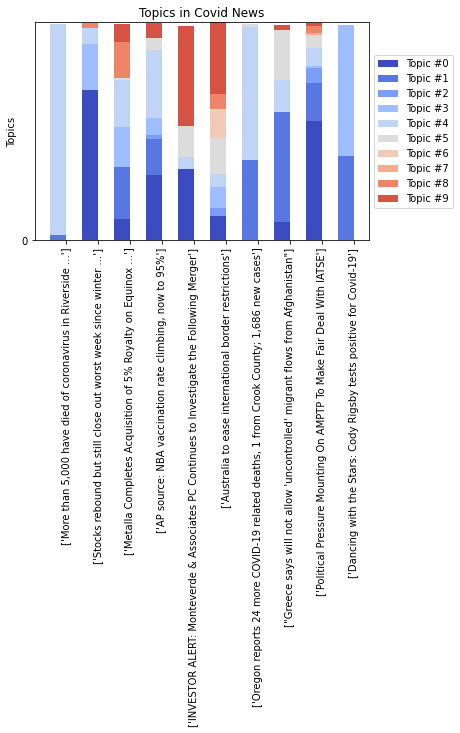

In [66]:
N = 10
ind = np.arange(N)
K = covid_lda.num_topics  # N documents, K topics
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Covid News')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

/home/wenqian/ipykernel_3414574/2024411388.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # fixes margins


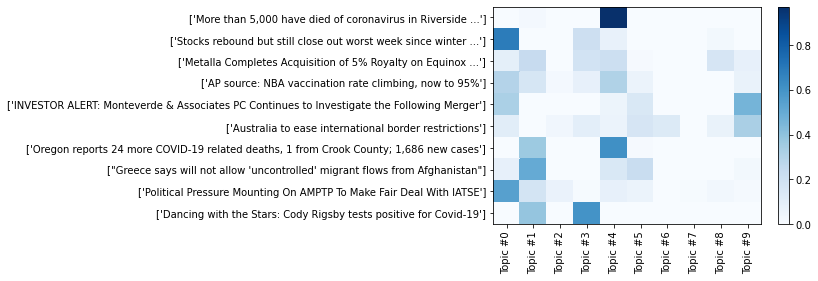

In [67]:
plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

In [68]:
covid_lda.show_topic(1)

[('people', 0.005675106),
 ('time', 0.0036875776),
 ('new', 0.0036505372),
 ('president', 0.00333439),
 ('year', 0.0033138602),
 ('years', 0.0029619082),
 ('world', 0.002666323),
 ('biden', 0.002605408),
 ('pandemic', 0.0024101948),
 ('know', 0.0022966722)]

In [69]:
topicsDict = {}
for topicNum in range(covid_lda.num_topics):
    topicWords = [w for w, p in covid_lda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pd.DataFrame(topicsDict)
wordRanksDF

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,year,people,covid19,game,covid19,covid19,cookies,people,covid19,market
1,new,time,cases,season,people,health,australia,covid19,health,company
2,pandemic,new,government,year,health,vaccine,safari,covid,article,year
3,time,president,india,team,new,patients,home,new,continues,growth
4,people,year,new,time,state,people,browser,government,people,financial
5,market,years,health,games,omicron,study,use,health,cases,business
6,company,world,people,players,cases,data,australian,cases,advertisement,quarter
7,business,biden,country,new,vaccine,vaccines,app,uk,content,report
8,work,pandemic,covid,covid19,vaccinated,research,select,time,email,share
9,companies,know,state,play,school,virus,menu,year,new,forward


<Figure size 432x288 with 0 Axes>

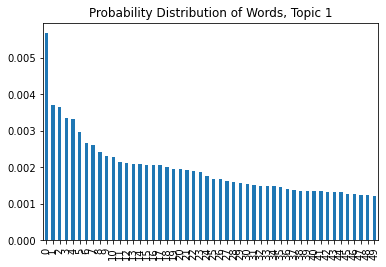

In [70]:
topic1_df = pd.DataFrame(covid_lda.show_topic(1, topn=50))
plt.figure()
topic1_df.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 1')
plt.show()

In [71]:
covid_lda.save('../models/lda_all')

In [4]:
covid_lda = gensim.models.ldamodel.LdaModel.load('../models/lda_all')

In [ ]:
covid_lda.get_document_topics()

In [5]:
data.shape[0]

127843

In [75]:
data['publisher'].value_counts().head(20)

Yahoo                   1658
YAHOO!News              1610
Reuters                 1414
Business Insider         925
New York Times           909
YAHOO!Finance            821
pna.gov.ph               810
Forbes                   774
Associated Press         772
Yahoo! Sports            725
newshub.co.nz            683
sunstar.com.ph           657
MarketWatch              656
Washington Post          653
theindependentbd.com     649
pageone.ph               629
New York Post            623
The Hill                 582
Fox News                 581
nyoooz.com               571
Name: publisher, dtype: int64

In [79]:
data_dtm = data[(data['publisher']=='Fox News') | (data['publisher']=='New York Times')].copy()
data_dtm

,id,length,date,country,publisher,snippet,body,body_tokens,body_tokens_normalized,snippet_tokens,trunc_sentence,sentiment_score,neg_sentim_score,body_tokens_reduced
28,88033929,554,21-10-01,US,New York Times,A pilot program hints at an eventual end to Au...,A pilot program hints at an eventual end to A...,"['A', 'pilot', 'program', 'hints', 'at', 'an',...","[pilot, program, hints, eventual, end, austral...","['A', 'pilot', 'program', 'hints', 'at', 'an',...","[""A pilot program hints at an eventual end to ...","[{'label': 'NEGATIVE', 'score': 0.978422582149...",0.400000,"[pilot, program, hints, eventual, end, austral..."
39,88035715,7205,21-10-01,US,New York Times,Merck says a trial shows it has produced the f...,Covid News : U.S. Parents ' Views Are Shiftin...,"['Covid', 'News', 'U.S.', 'Parents', 'Views', ...","[covid, news, us, parents, views, shifting, va...","['Merck', 'says', 'a', 'trial', 'shows', 'it',...","['Covid News : U', ""Parents ' Views Are Shifti...","[{'label': 'NEGATIVE', 'score': 0.732781469821...",0.666667,"[covid, news, parents, views, shifting, vaccin..."
170,88046027,300,21-10-03,US,Fox News,Fauci defends California school vaccine mandat...,""" I have been and I still am in favor of thes...","['I', 'have', 'been', 'and', 'I', 'still', 'am...","[favor, kinds, mandates, fauci, said, abc, wee...","['Fauci', 'defends', 'California', 'school', '...","['"" I have been and I still am in favor of the...","[{'label': 'POSITIVE', 'score': 0.997584581375...",0.500000,"[favor, kinds, mandates, fauci, abc, week, exc..."
173,88046227,501,21-10-03,US,New York Times,Israel will require a booster shot to be consi...,Israel will require a booster shot to be cons...,"['Israel', 'will', 'require', 'a', 'booster', ...","[israel, require, booster, shot, considered, f...","['Israel', 'will', 'require', 'a', 'booster', ...",['Israel will require a booster shot to be con...,"[{'label': 'NEGATIVE', 'score': 0.997277677059...",0.800000,"[israel, require, booster, shot, considered, f..."
270,88055023,1417,21-10-05,US,New York Times,How Do Thousands Prepare for a Climate Summit?...,"In a few weeks , an estimated 20,000 minister...","['In', 'a', 'few', 'weeks', 'an', 'estimated',...","[weeks, estimated, ministers, activists, execu...","['How', 'Do', 'Thousands', 'Prepare', 'for', '...","['In a few weeks , an estimated 20,000 ministe...","[{'label': 'POSITIVE', 'score': 0.997138023376...",0.500000,"[weeks, estimated, ministers, activists, execu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119097,88712690,738,22-01-30,US,New York Times,N.Y.C. is offering free home delivery of Covid...,N.Y.C. is offering free home delivery of Covi...,"['N.Y.C.', 'is', 'offering', 'free', 'home', '...","[nyc, offering, free, home, delivery, covid, a...","['N.Y.C.', 'is', 'offering', 'free', 'home', '...",['is offering free home delivery of Covid anti...,"[{'label': 'NEGATIVE', 'score': 0.984735727310...",0.666667,"[nyc, offering, free, home, delivery, covid, a..."
119122,88715572,1013,22-01-30,US,New York Times,How Do You Respond When an Anti-Vaxxer Dies of...,How Do You Respond When an Anti-Vaxxer Dies o...,"['How', 'Do', 'You', 'Respond', 'When', 'an', ...","[respond, anti, vaxxer, dies, covid, father, m...","['How', 'Do', 'You', 'Respond', 'When', 'an', ...",['How Do You Respond When an Anti-Vaxxer Dies ...,"[{'label': 'POSITIVE', 'score': 0.533167958259...",0.600000,"[respond, anti, vaxxer, dies, covid, father, m..."
119123,88715573,287,22-01-30,US,New York Times,England extends vaccines to vulnerable childre...,Those children who are deemed clinically vuln...,"['Those', 'children', 'who', 'are', 'deemed', ...","[children, deemed, clinically, vulnerable, liv...","['England', 'extends', 'vaccines', 'to', 'vuln...",['Those children who are deemed clinically vul...,"[{'label': 'NEGATIVE', 'score': 0.998101770877...",0.833333,"[children, deemed, clinically, vulnerable, liv..."
119242,88719009,390,22-01-31,US,New York Times,The Joe Roga

In [80]:
data_dtm.to_csv('dtm_data.csv', index=False)

## Dynamic Topic Model

In [41]:
from gensim.models import ldaseqmodel

In [55]:
data['year_month'] = data['date'].apply(lambda x: x[: 5])
data.sort_values(by=['year_month'], inplace=True)
docs_per_time_slice = data['year_month'].value_counts().sort_index().tolist()

In [61]:
dictionary.save('../models/lda_dict')

In [ ]:
ldaseq = ldaseqmodel.LdaSeqModel(corpus=corpus, id2word=dictionary, time_slice=docs_per_time_slice, num_topics=4)

In [62]:
docs_per_time_slice

[13758,
 9460,
 13417,
 12683,
 12219,
 9535,
 7805,
 8488,
 7064,
 5518,
 5625,
 8656,
 13615]